<a href="https://colab.research.google.com/github/S-AILAB/Predicting-Diabetes-using-Decision-Tree/blob/main/Decision_Trees_Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**DECISION TREE -- DIABETES Prediction**

**Problem Statement**

The task is to build a Decision Tree model to predict whether an individual has diabetes based on the features provided. The challenge is to create a classifier that can accurately predict the outcome.

##Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##Loading Data

In [ ]:
df = pd.read_csv('/content/Diabetes.csv')

## Data Pre-processing

In [ ]:
df.head(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
0,6,148,72,35,0,33.6,0.627,50,YES
1,1,85,66,29,0,26.6,0.351,31,NO
2,8,183,64,0,0,23.3,0.672,32,YES
3,1,89,66,23,94,28.1,0.167,21,NO
4,0,137,40,35,168,43.1,2.288,33,YES


In [ ]:
df.tail(5)

,Number of times pregnant,Plasma glucose concentration,Diastolic blood pressure,Triceps skin fold thickness,2-Hour serum insulin,Body mass index,Diabetes pedigree function,Age (years),Outcome
763,10,101,76,48,180,32.9,0.171,63,NO
764,2,122,70,27,0,36.8,0.340,27,NO
765,5,121,72,23,112,26.2,0.245,30,NO
766,1,126,60,0,0,30.1,0.349,47,YES
767,1,93,70,31,0,30.4,0.315,23,NO


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0    Number of times pregnant      768 non-null    int64  
 1    Plasma glucose concentration  768 non-null    int64  
 2    Diastolic blood pressure      768 non-null    int64  
 3    Triceps skin fold thickness   768 non-null    int64  
 4    2-Hour serum insulin          768 non-null    int64  
 5    Body mass index               768 non-null    float64
 6    Diabetes pedigree function    768 non-null    float64
 7    Age (years)                   768 non-null    int64  
 8   Outcome                        768 non-null    object 
dtypes: float64(2), int64(6), object(1)
memory usage: 54.1+ KB


In [ ]:
df.columns

Index([' Number of times pregnant', ' Plasma glucose concentration',
       ' Diastolic blood pressure', 'Skin_Thickness', 'Insulin',
       ' Body mass index', ' Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
#column rename
df = df.rename(columns = {' Number of times pregnant': 'Pregnancies',
                          ' Plasma glucose concentration': 'Glucose',
                          ' Diastolic blood pressure': 'Blood_Pressure',
                          ' Triceps skin fold thickness': 'Skin_Thickness',
                          ' 2-Hour serum insulin': 'Insulin',
                          ' Age (years)': 'Age'})

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       ' Body mass index', ' Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

Data Cleaning and Feature Engineering

In [ ]:
#checking null values
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
Blood_Pressure,0
Skin_Thickness,0
Insulin,0
Body mass index,0
Diabetes pedigree function,0
Age,0
Outcome,0


Observation: There are Zero Nulls

In [ ]:
#checking duplicate values
df.duplicated().sum()

np.int64(0)

Observation: There are no duplicate values in the data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Pregnancies                  768 non-null    int64  
 1   Glucose                      768 non-null    int64  
 2   Blood_Pressure               768 non-null    int64  
 3   Skin_Thickness               768 non-null    int64  
 4   Insulin                      768 non-null    int64  
 5    Body mass index             768 non-null    float64
 6    Diabetes pedigree function  768 non-null    float64
 7   Age                          768 non-null    int64  
 8   Outcome                      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Checking if there are any zero's in the data set in the numerical datatypes

In [ ]:
numerical_columns = df.drop(columns=['Outcome', 'Pregnancies']).columns
numerical_columns


Index(['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       ' Body mass index', ' Diabetes pedigree function', 'Age'],
      dtype='object')

In [ ]:
zero_check = (df[numerical_columns] == 0).any()
zero_check

,0
Glucose,True
Blood_Pressure,True
Skin_Thickness,True
Insulin,True
Body mass index,True
Diabetes pedigree function,False
Age,False


In [ ]:
count_zero = (df[numerical_columns] == 0).sum()
count_zero

,0
Glucose,5
Blood_Pressure,35
Skin_Thickness,227
Insulin,374
Body mass index,11
Diabetes pedigree function,0
Age,0


Observation: since the number of 0 in all these columns are too high we cannot drop them as it will affect the data quantity.

Secondly keeping Zero as it as will destort the data as well as the output.

Therefore to maintain the data quality and qunatity let's replace these 0 with their column specific median value.

In [ ]:
for i in numerical_columns:
  df[i] = df[i].replace(0, df[i].median())

In [ ]:
count_zero1 = (df[numerical_columns] == 0).sum()
count_zero1

,0
Glucose,0
Blood_Pressure,0
Skin_Thickness,0
Insulin,0
Body mass index,0
Diabetes pedigree function,0
Age,0


## Encoding the Outcome column

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['Outcome'] = encoder.fit_transform(df['Outcome'])

In [ ]:
df

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
0,6,148,72.0,35.0,30.5,33.6,0.6270,50.0,1
1,1,85,66.0,29.0,30.5,26.6,0.3510,31.0,0
2,8,183,64.0,23.0,30.5,23.3,0.6720,32.0,1
3,1,89,66.0,23.0,94.0,28.1,0.1670,21.0,0
4,0,137,40.0,35.0,168.0,43.1,0.3725,33.0,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76.0,23.0,180.0,32.9,0.1710,29.0,0
764,2,122,70.0,27.0,30.5,36.8,0.3400,27.0,0
765,5,121,72.0,23.0,112.0,26.2,0.2450,30.0,0
766,1,126,60.0,23.0,30.5,30.1,0.3490,47.0,1


##Checking Outliers and Fixing them

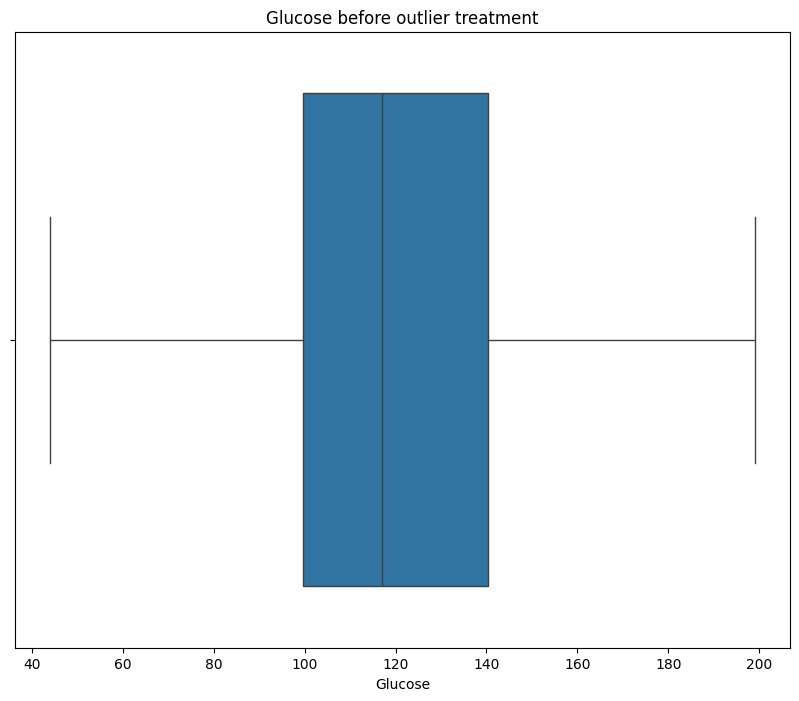

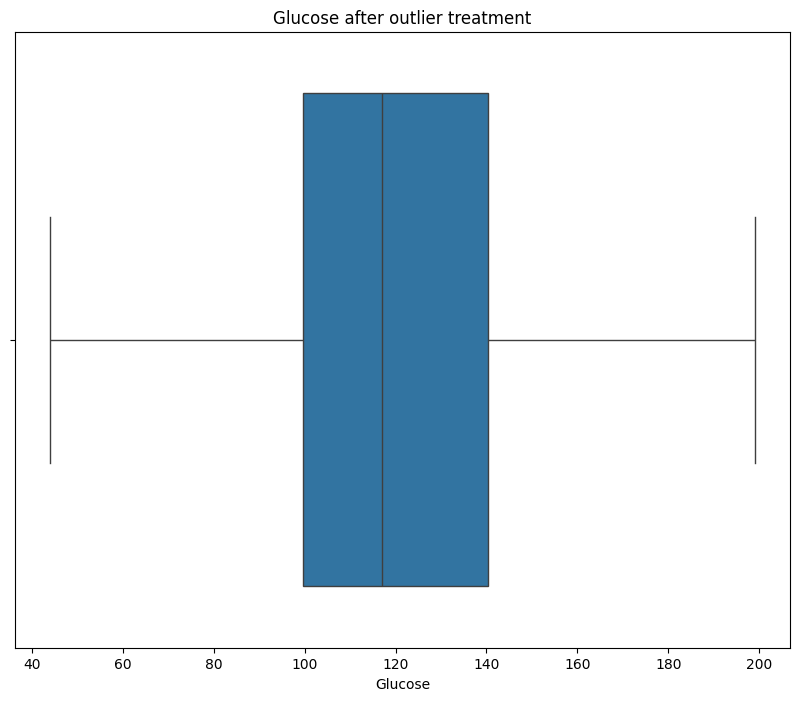

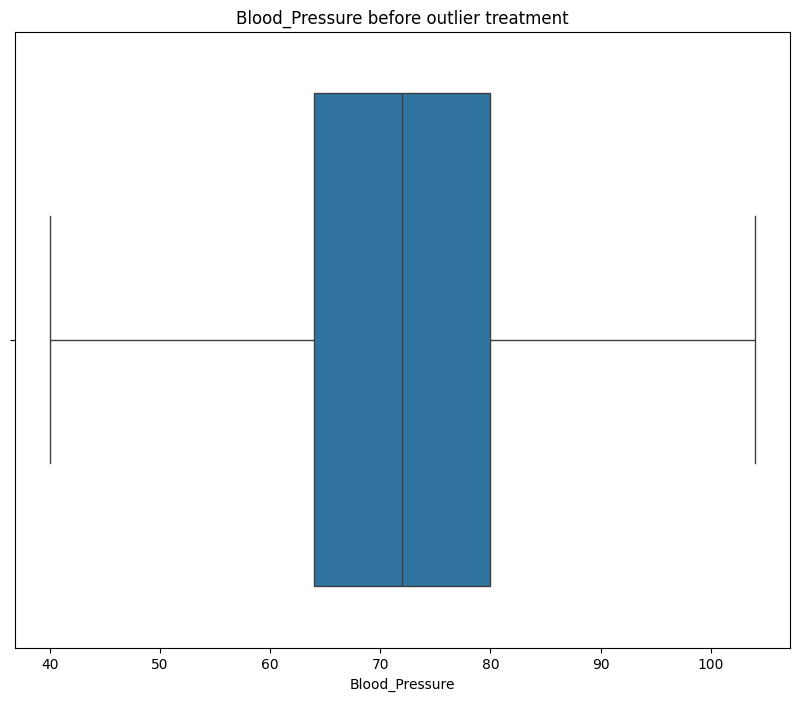

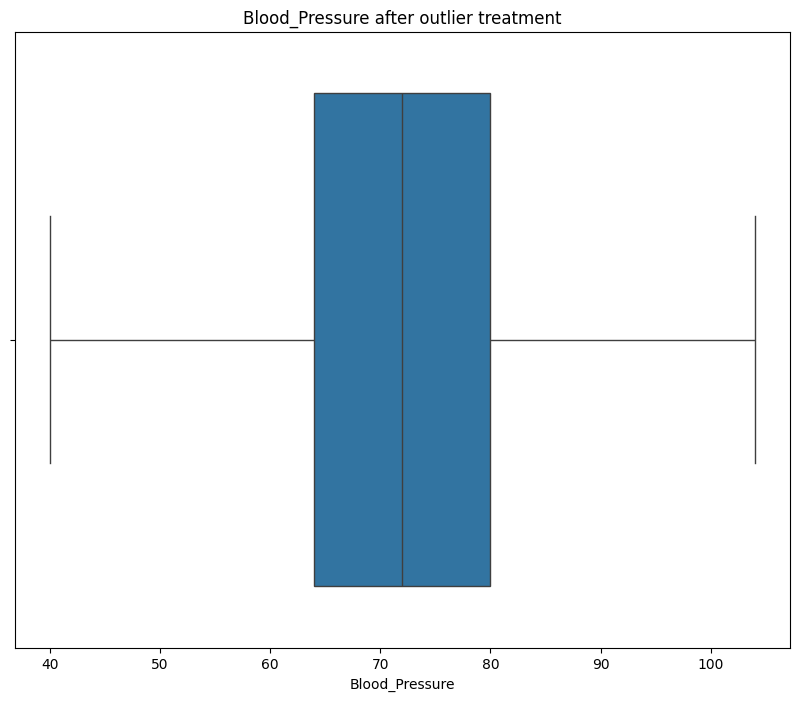

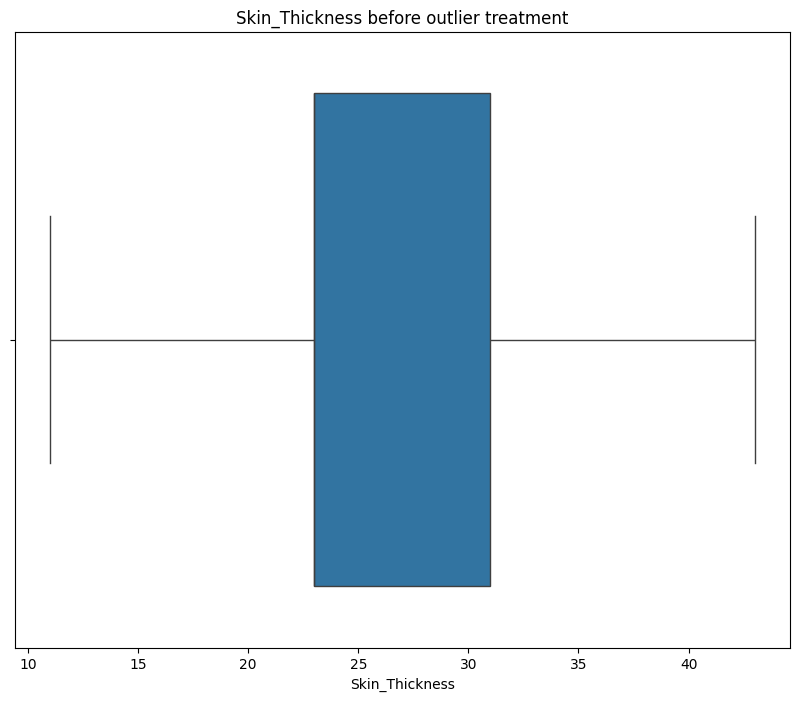

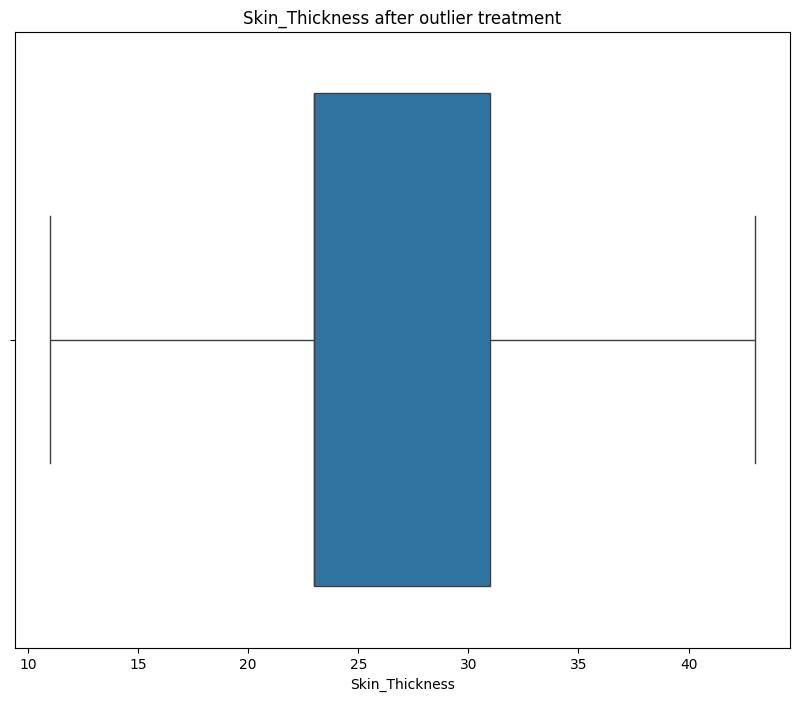

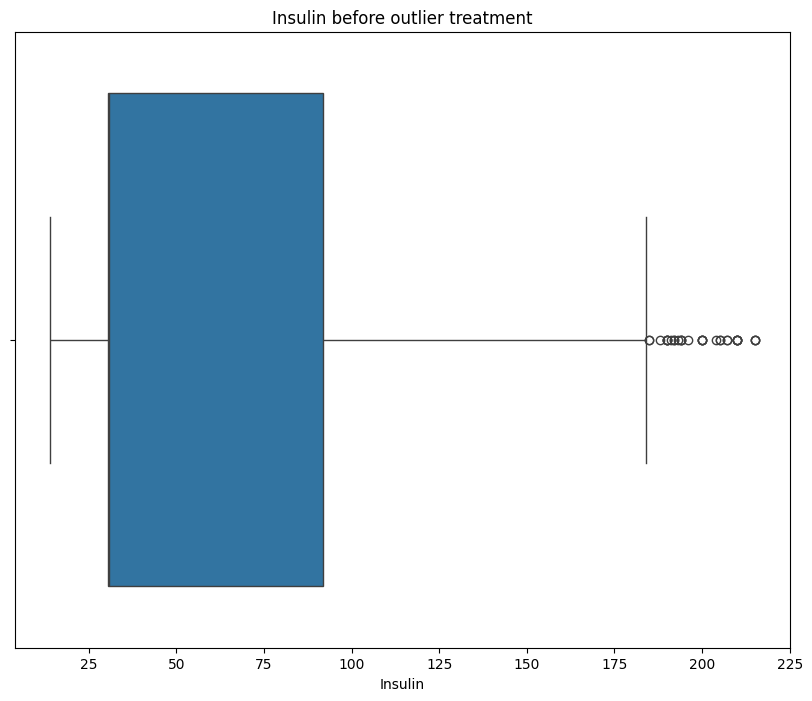

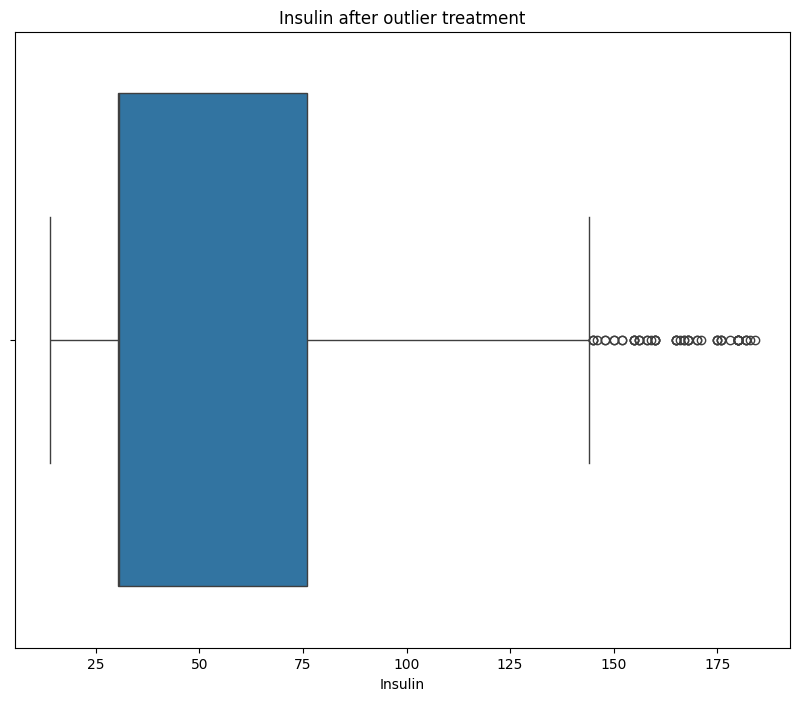

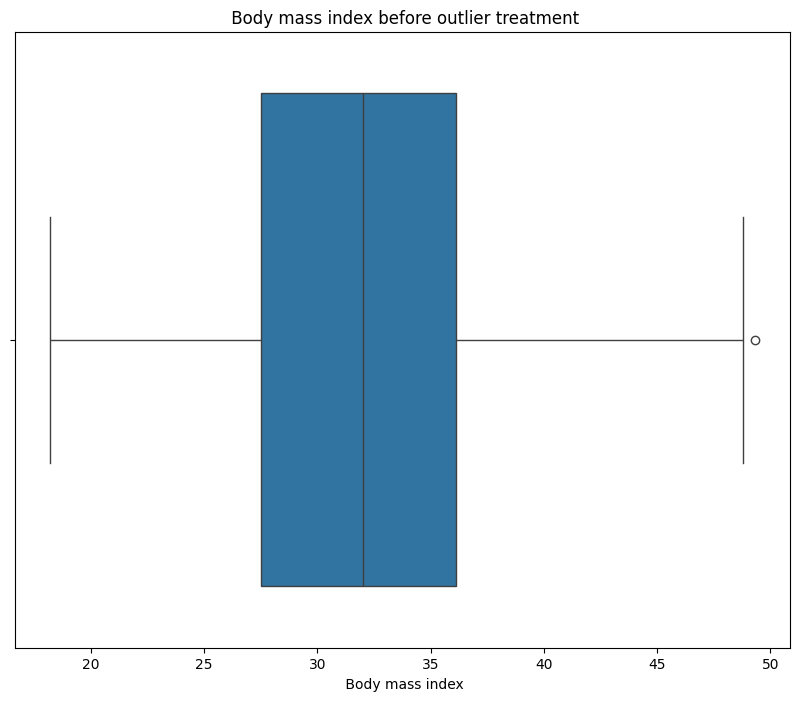

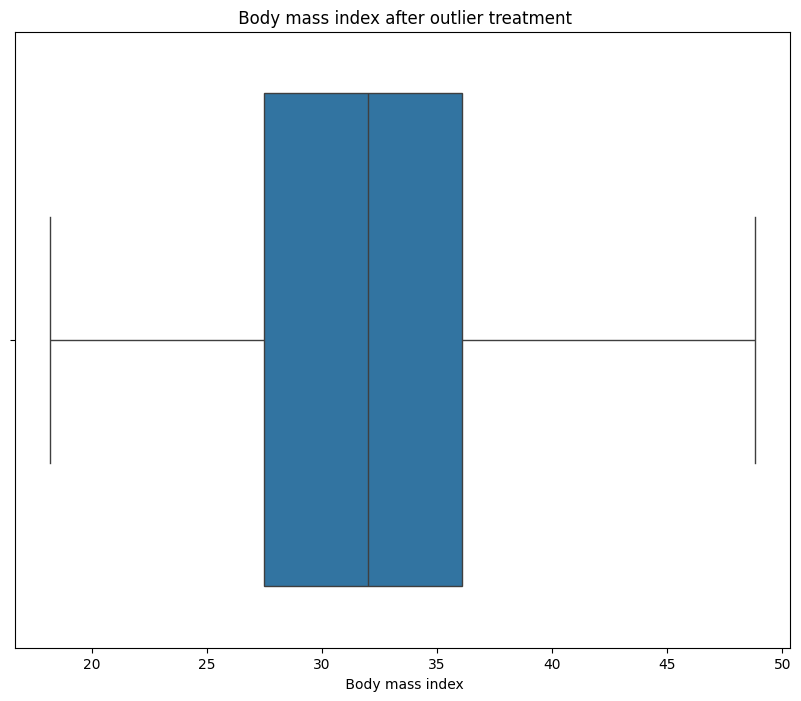

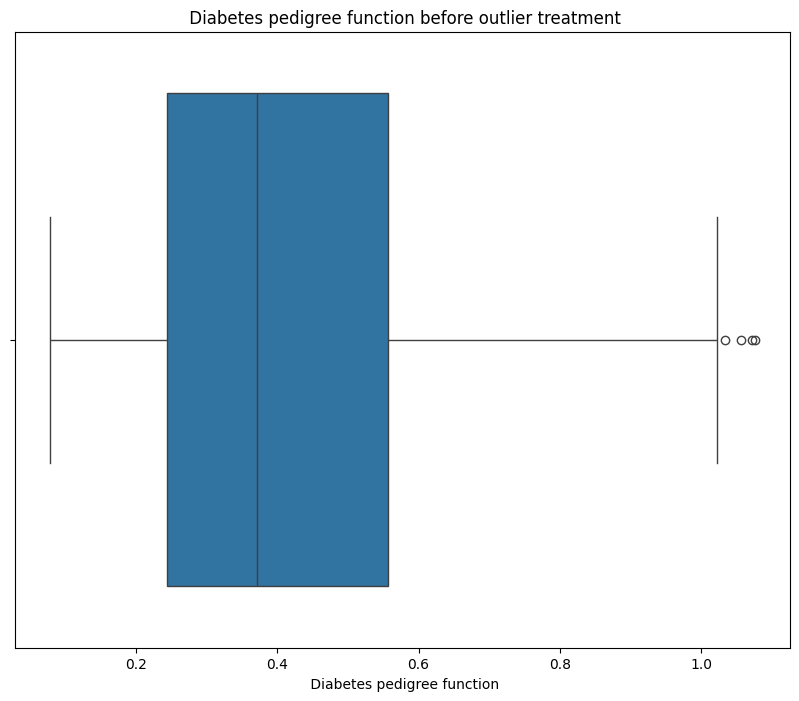

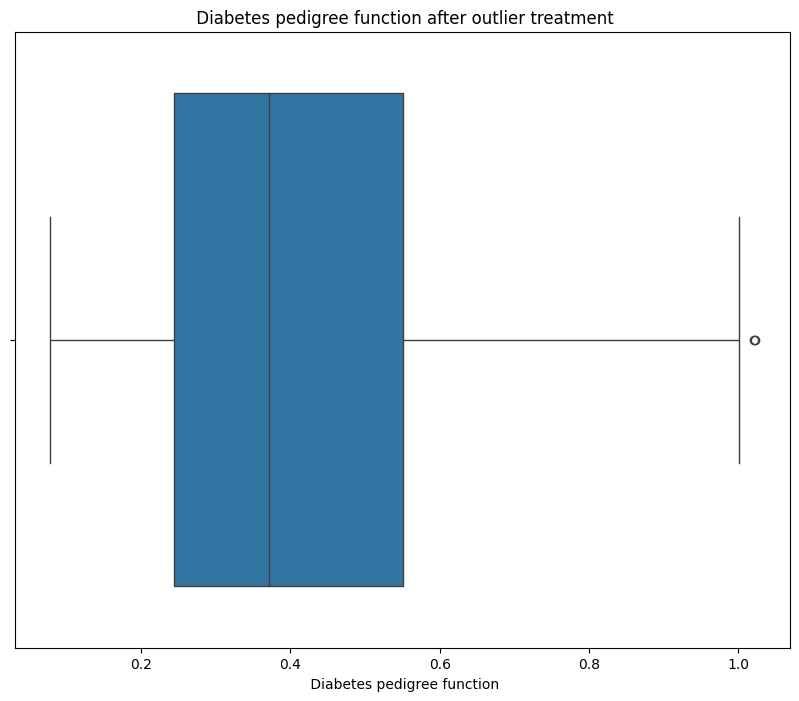

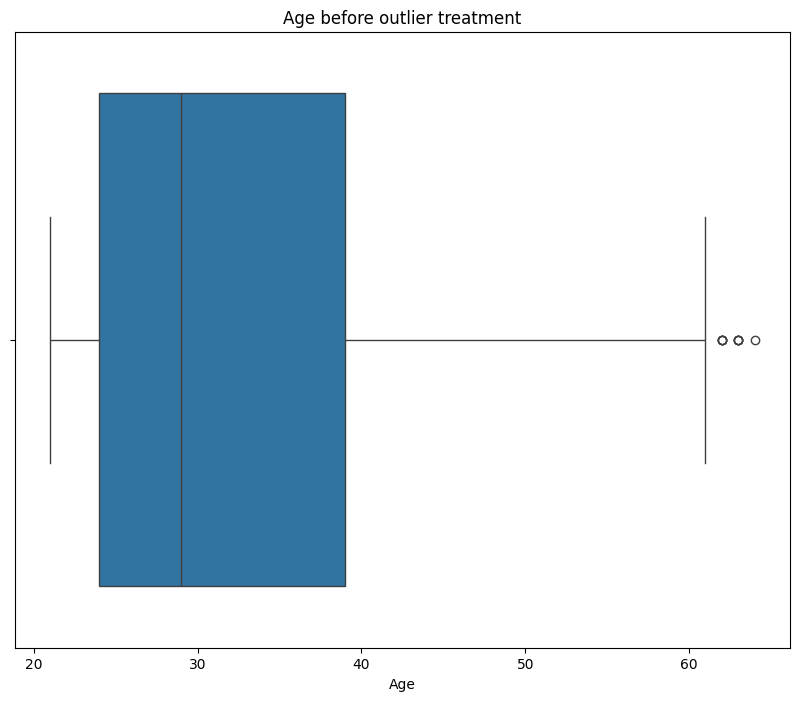

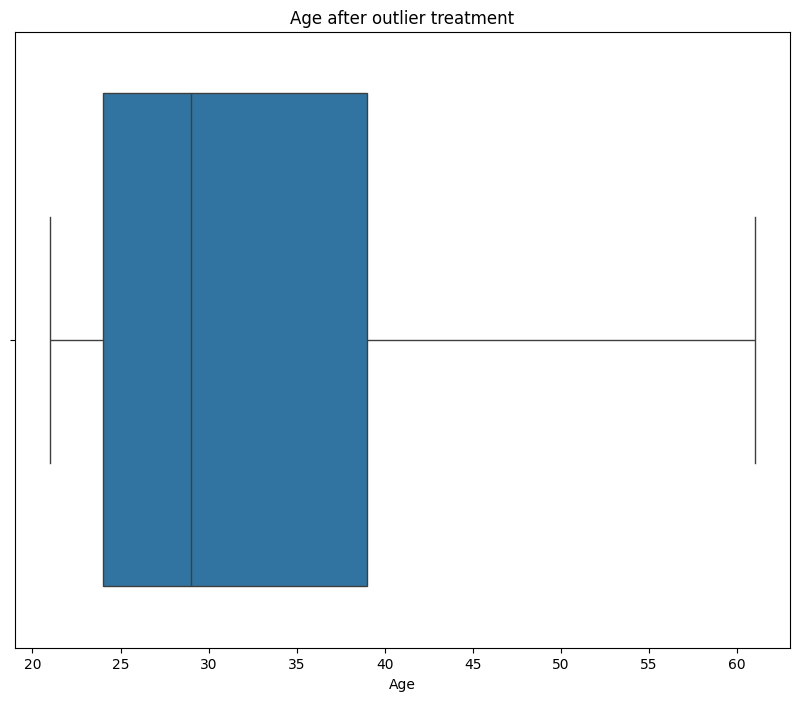

In [ ]:
for i in numerical_columns:
  plt.figure(figsize=(10,8))
  sns.boxplot(x = df[i])
  plt.title(f"{i} before outlier treatment")
  plt.show()

  Q1 = df[i].quantile(0.25)
  Q3 = df[i].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  median_value = df[i].median()
  df[i] = df[i].apply(lambda x: median_value if x < lower_bound or x > upper_bound else x)

  plt.figure(figsize=(10,8))
  sns.boxplot(x = df[i])
  plt.title(f"{i} after outlier treatment")
  plt.show()



## EDA

Data Statistics Summary

In [ ]:
df.describe()

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,Body mass index,Diabetes pedigree function,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.108073,26.054688,57.361165,32.107031,0.408996,32.032552,0.348958
std,3.369578,30.438286,10.874178,7.057568,43.577852,6.284780,0.218380,10.082592,0.476951
min,0.000000,44.000000,40.000000,11.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.593750,32.000000,0.371188,29.000000,0.000000
75%,6.000000,140.250000,80.000000,31.000000,76.000000,36.100000,0.551000,39.000000,1.000000
max,17.000000,199.000000,104.000000,43.000000,184.000000,48.800000,1.022000,61.000000,1.000000


##Univariate Analysis

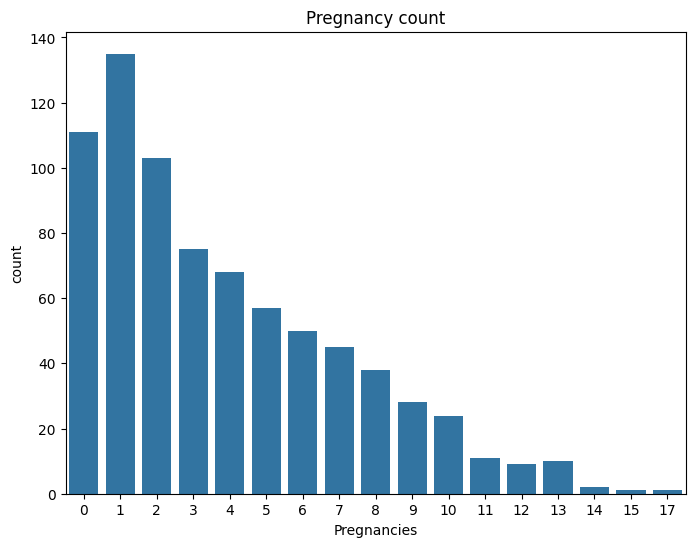

In [ ]:
plt.figure(figsize=(8,6))
sns.countplot(x = df['Pregnancies'])
plt.title('Pregnancy count')
plt.show()

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       ' Body mass index', ' Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

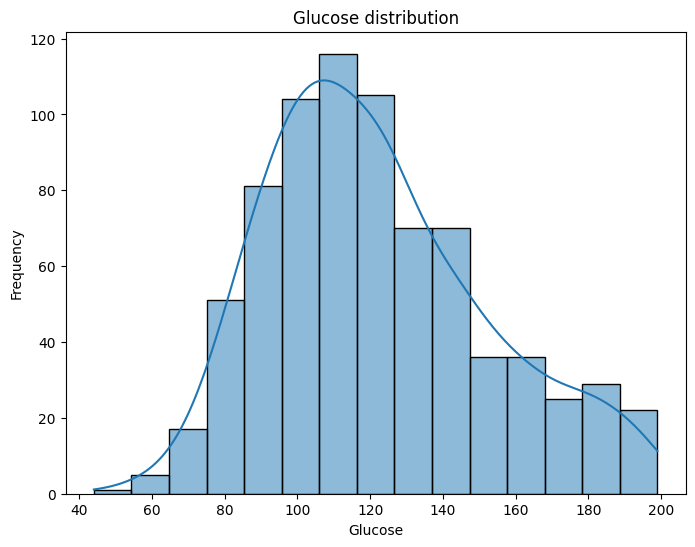

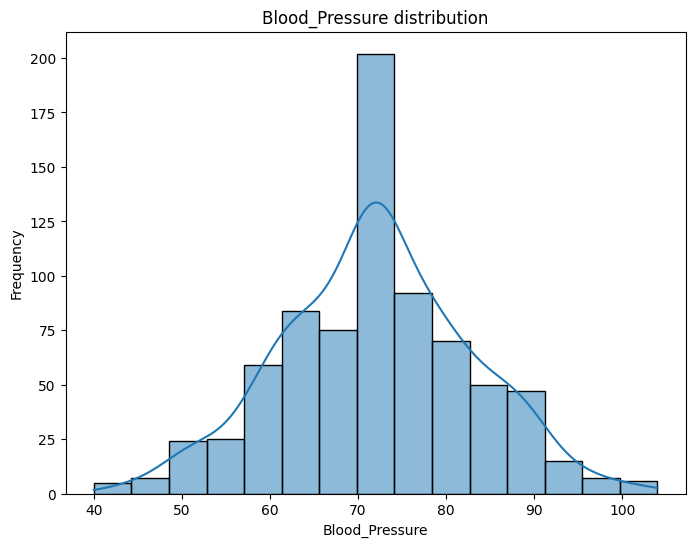

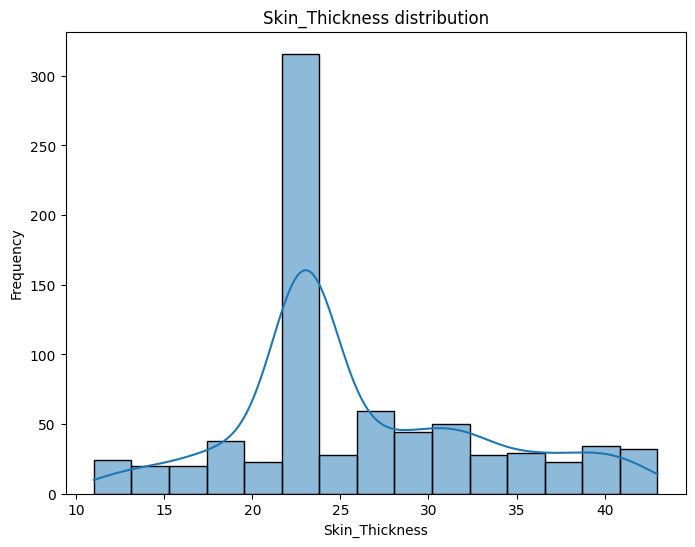

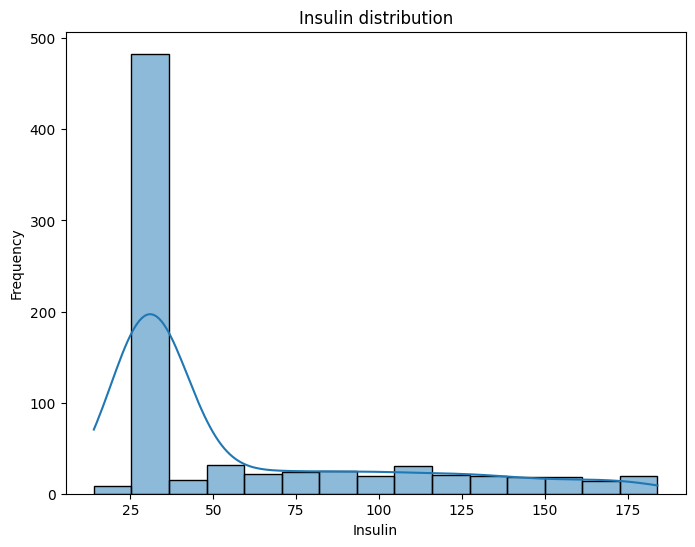

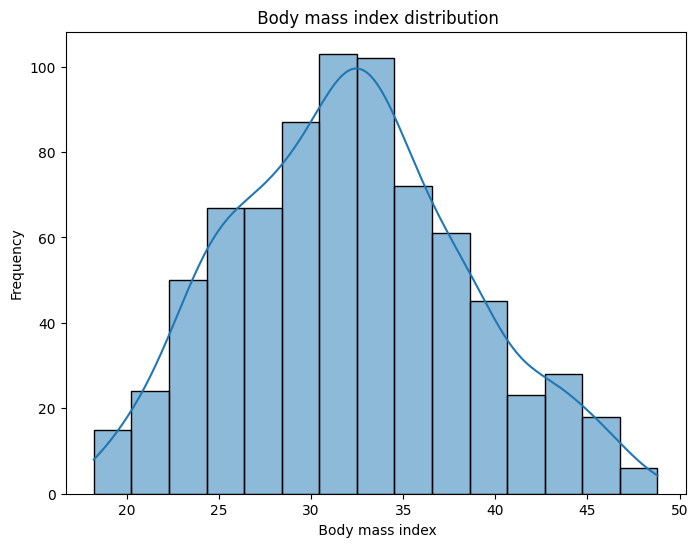

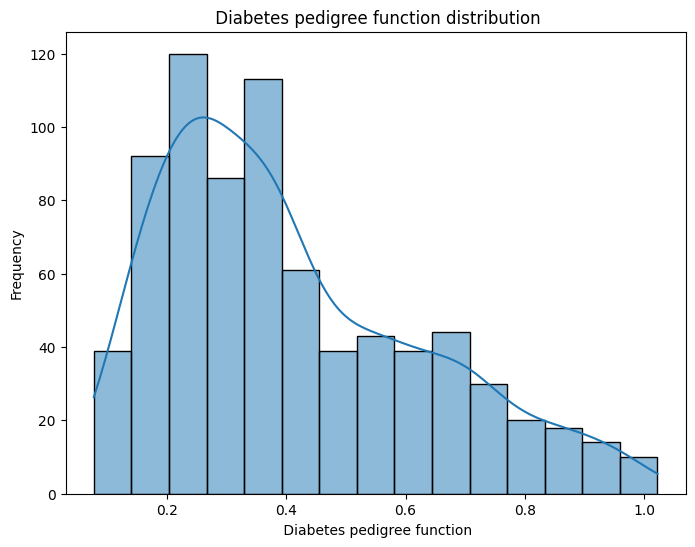

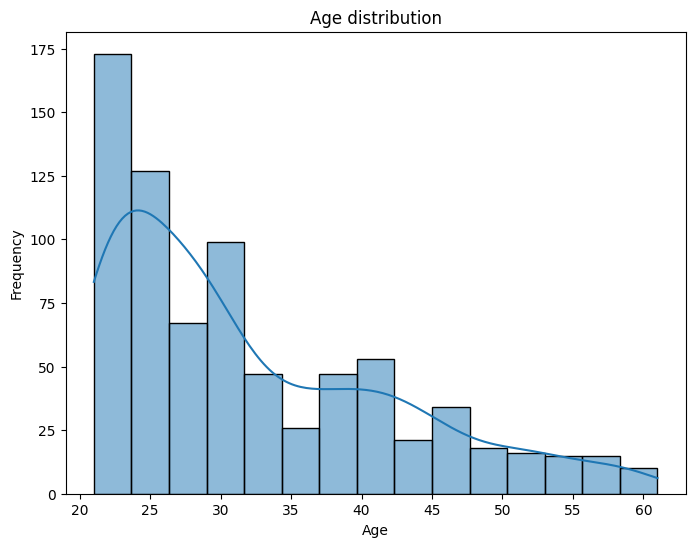

In [ ]:
col = df[['Glucose','Blood_Pressure', 'Skin_Thickness', 'Insulin', ' Body mass index', ' Diabetes pedigree function','Age']]
for i in col:
  plt.figure(figsize=(8,6))
  sns.histplot(x = df[i], kde = True, bins = 15)
  plt.xlabel(i)
  plt.ylabel('Frequency')
  plt.title(f"{i} distribution")
  plt.show()

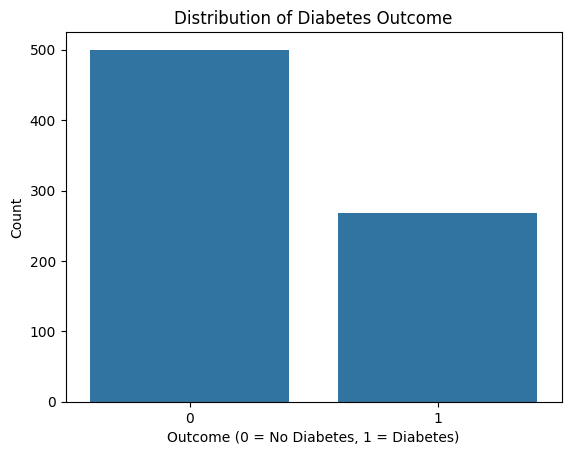

In [ ]:
sns.countplot(x='Outcome', data=df)
plt.title('Distribution of Diabetes Outcome')
plt.xlabel('Outcome (0 = No Diabetes, 1 = Diabetes)')
plt.ylabel('Count')
plt.show()

##Bi-variate Analysis

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       ' Body mass index', ' Diabetes pedigree function', 'Age', 'Outcome'],
      dtype='object')

In [ ]:
numerical_columns

Index(['Glucose', 'Blood_Pressure', 'Skin_Thickness', 'Insulin',
       ' Body mass index', ' Diabetes pedigree function', 'Age'],
      dtype='object')

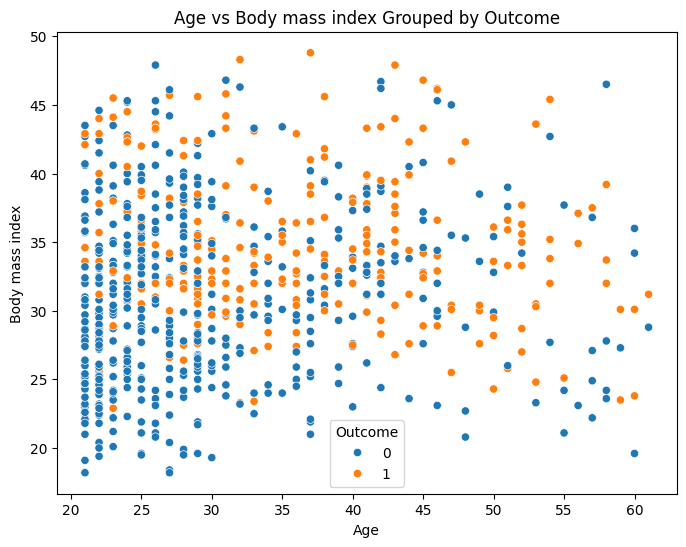

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = df['Age'], y = df[' Body mass index'], hue = 'Outcome') #hue is to groupby
plt.xlabel('Age')
plt.ylabel('Body mass index')
plt.title('Age vs Body mass index Grouped by Outcome')
plt.show()

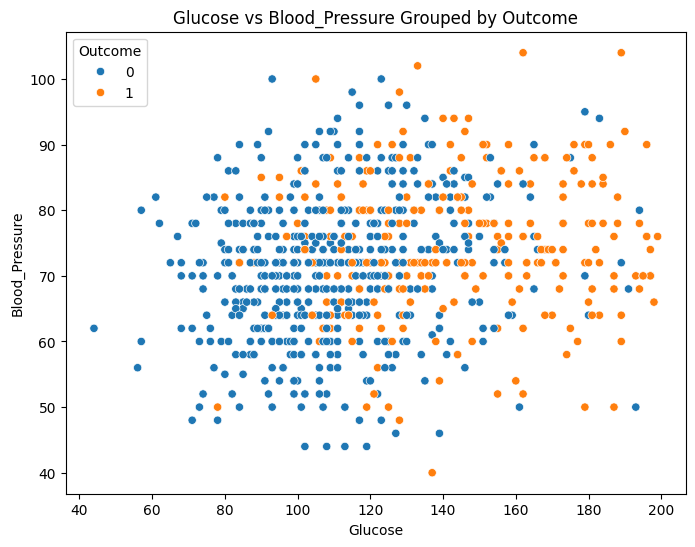

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(data = df, x = df['Glucose'], y = df['Blood_Pressure'], hue = 'Outcome') #hue is to groupby
plt.xlabel('Glucose')
plt.ylabel('Blood_Pressure')
plt.title('Glucose vs Blood_Pressure Grouped by Outcome')
plt.show()

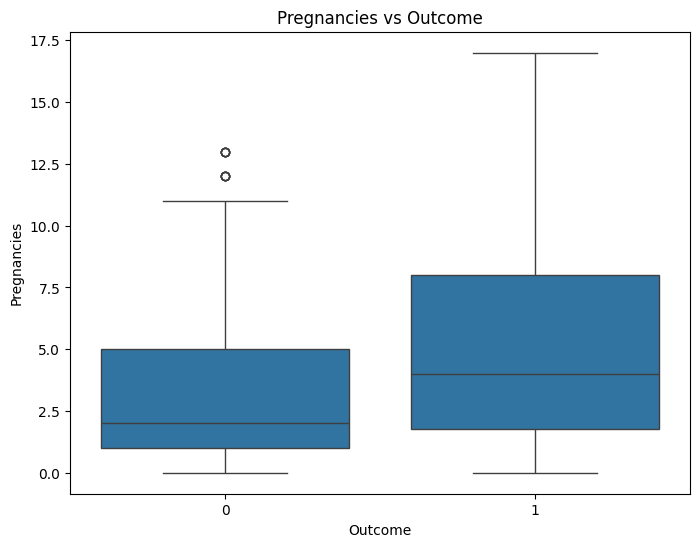

In [ ]:
plt.figure(figsize=(8,6))
sns.boxplot(x = df['Outcome'], y = df['Pregnancies'])
plt.xlabel('Outcome')
plt.ylabel('Pregnancies')
plt.title('Pregnancies vs Outcome')

plt.show()

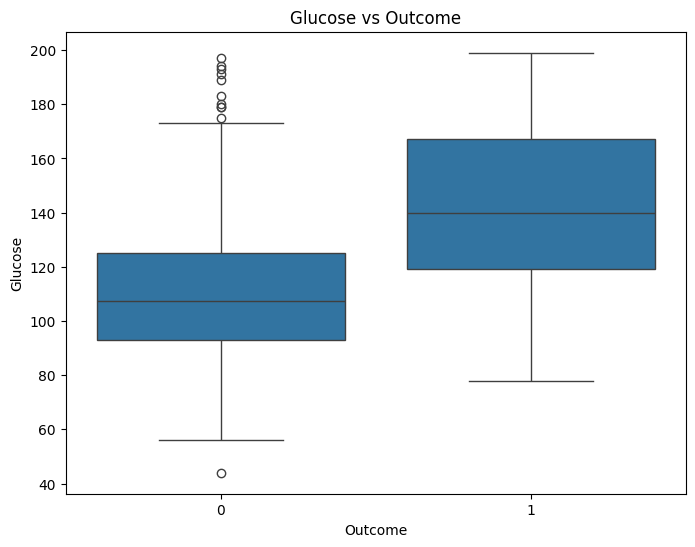

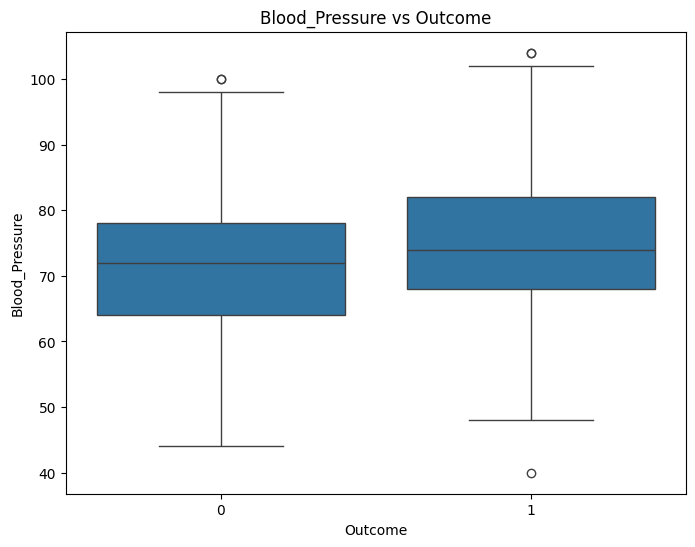

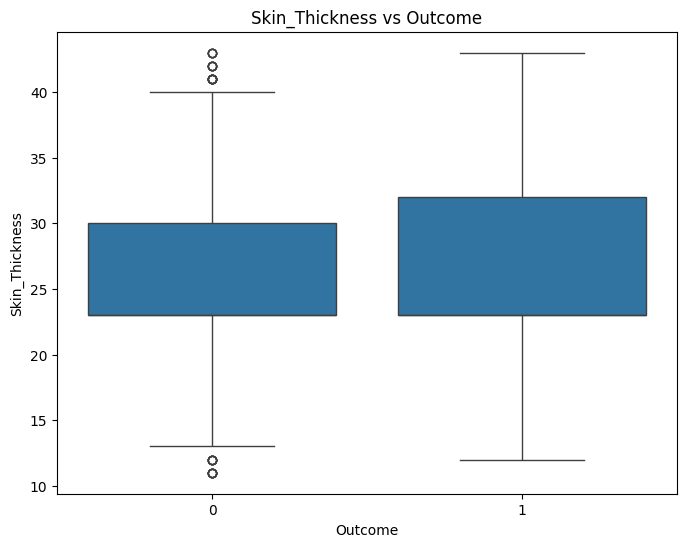

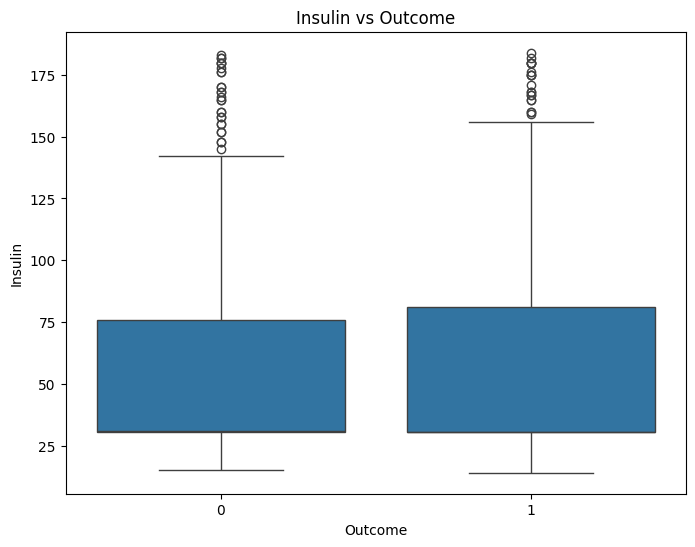

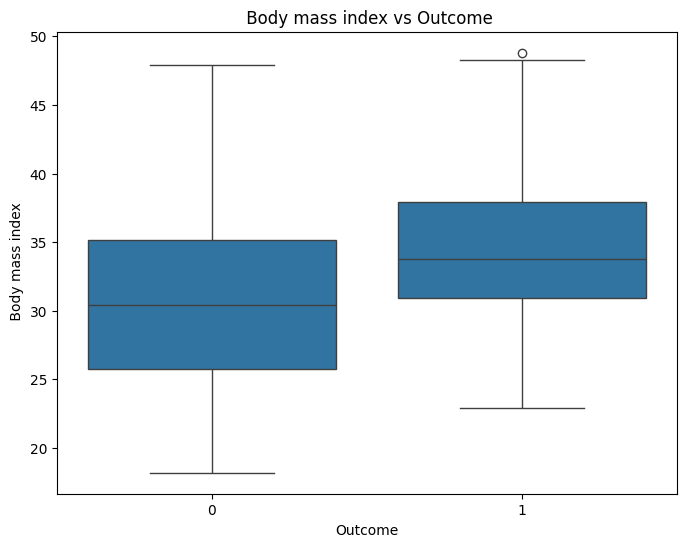

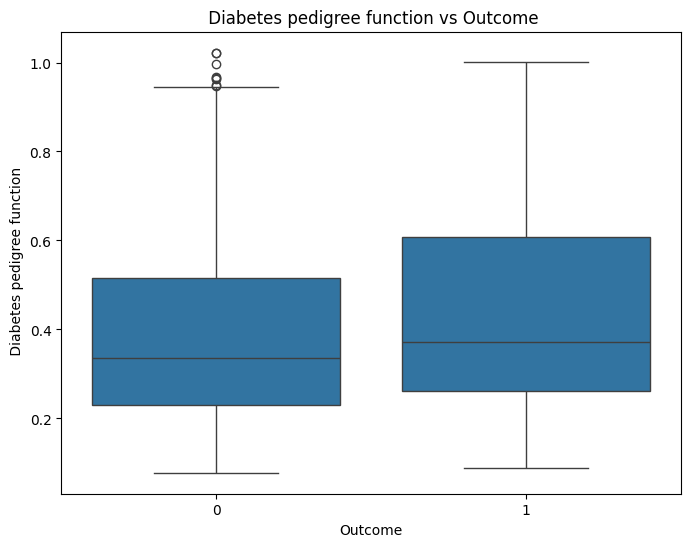

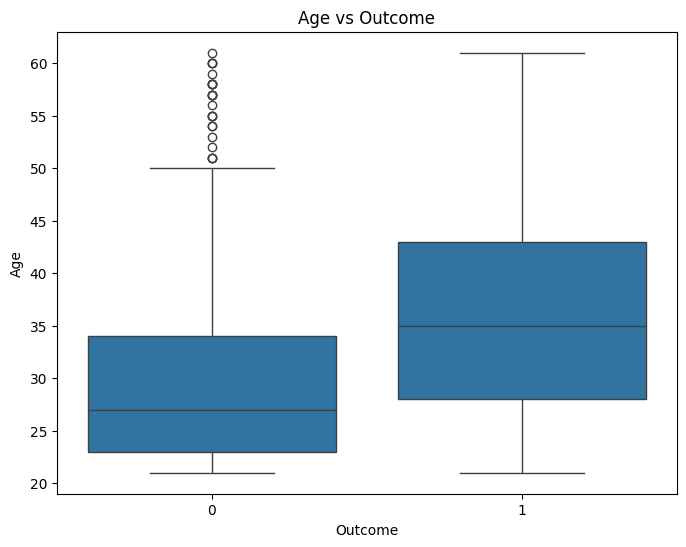

In [ ]:
for i in numerical_columns:
  plt.figure(figsize=(8,6))
  sns.boxplot(x = df['Outcome'], y = df[i])
  plt.xlabel('Outcome')
  plt.ylabel(i)
  plt.title(f"{i} vs Outcome")


## Correlation Analysis by Heatmap

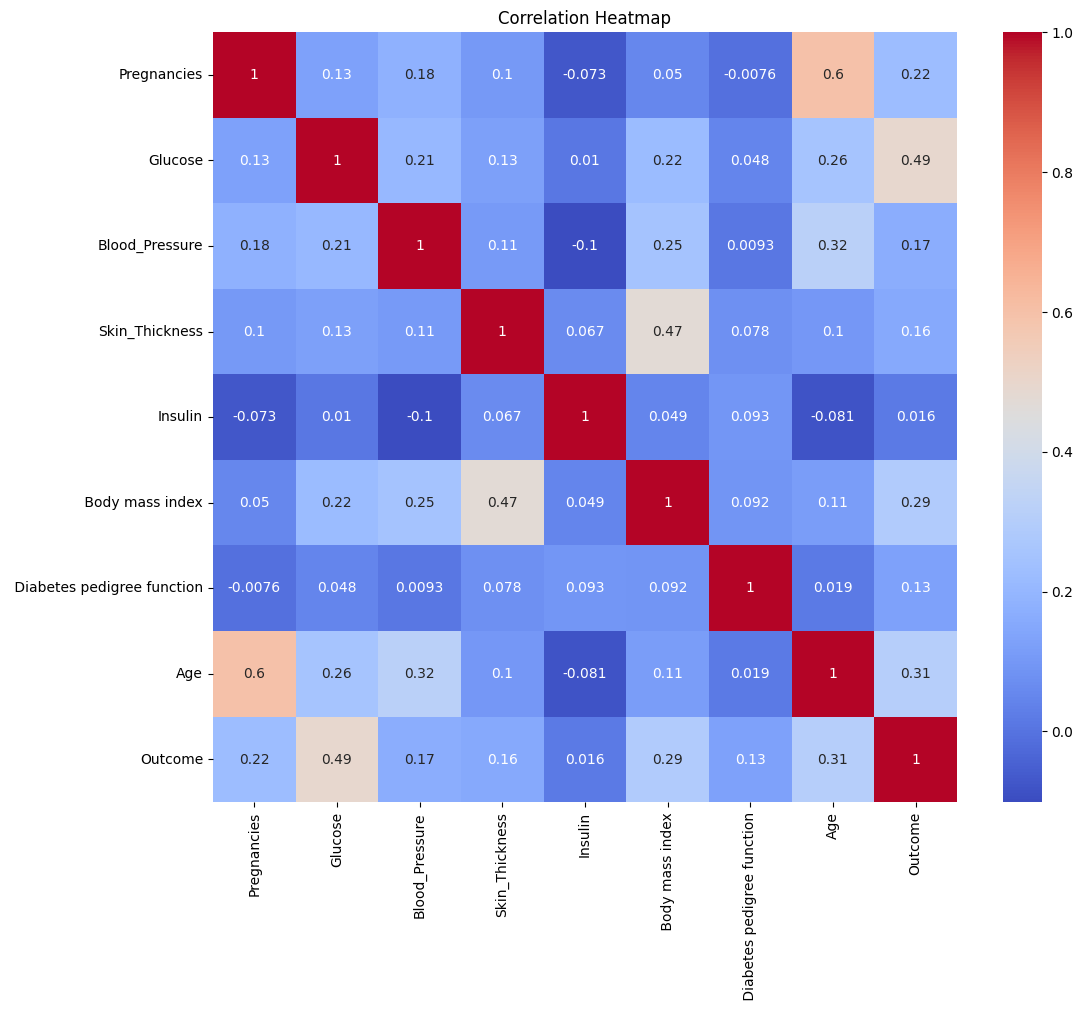

In [ ]:

plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

##Model Training

In [ ]:
X = df.drop(columns = ['Outcome'])
Y = df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [ ]:
print("X_train: ", X_train.shape)
print("X_test: ", X_test.shape)
print("Y_train: ", Y_train.shape)
print("Y_test: ", Y_test.shape)

X_train:  (576, 8)
X_test:  (192, 8)
Y_train:  (576,)
Y_test:  (192,)


In [ ]:
X_train.head(5)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,Body mass index,Diabetes pedigree function,Age
762,9,89,62.0,23.0,30.50,22.5,0.142,33.0
127,1,118,58.0,36.0,94.00,33.3,0.261,23.0
564,0,91,80.0,23.0,30.50,32.4,0.601,27.0
375,12,140,82.0,43.0,31.25,39.2,0.528,58.0
663,9,145,80.0,23.0,130.00,37.9,0.637,40.0


In [ ]:
Y_train.head(5)

,Outcome
762,0
127,0
564,0
375,1
663,1


In [ ]:
X_test.head(5)

,Pregnancies,Glucose,Blood_Pressure,Skin_Thickness,Insulin,Body mass index,Diabetes pedigree function,Age
661,1,199,76.0,43.0,30.5,42.9,0.3725,22.0
122,2,107,74.0,30.0,100.0,33.6,0.4040,23.0
113,4,76,62.0,23.0,30.5,34.0,0.3910,25.0
14,5,166,72.0,19.0,175.0,25.8,0.5870,51.0
529,0,111,65.0,23.0,30.5,24.6,0.6600,31.0


In [ ]:
Y_test.head(5)

,Outcome
661,1
122,0
113,0
14,1
529,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier(random_state = 42)

In [ ]:
model = model.fit(X_train, Y_train)

## Evaluate the model

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[0 0 0 0 0 0 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 1
 0 0 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 1 0 0 0 1 1 1 0 1 0 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 1 0 0 0]


In [ ]:
from sklearn import metrics
print("Accuracy: ", metrics.accuracy_score(Y_test, y_pred))

Accuracy:  0.75


##Decision Tree

In [ ]:
from sklearn import tree

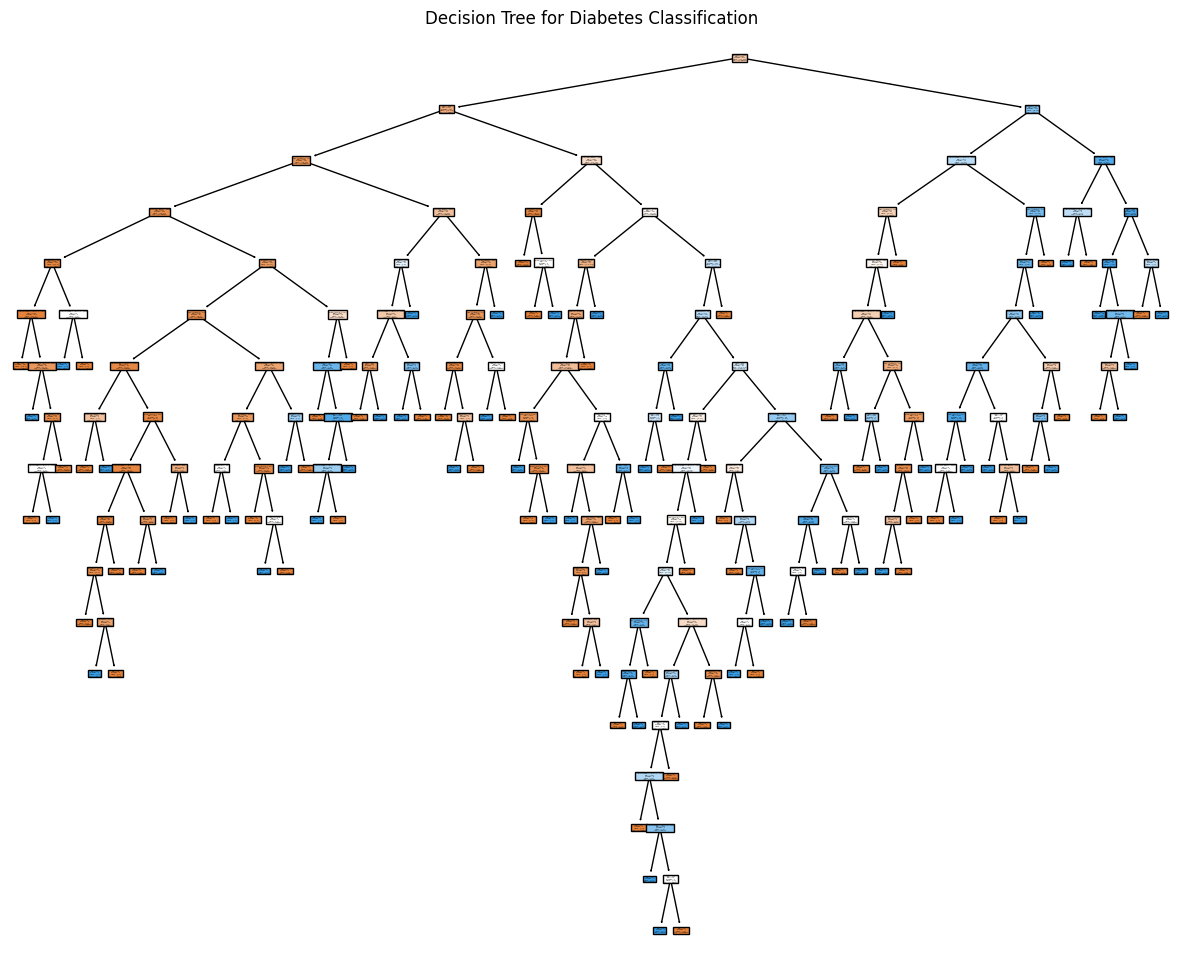

In [ ]:
plt.figure(figsize=(15,12))
dt = tree.plot_tree(model,feature_names = df.drop('Outcome', axis = 1).columns, class_names = ['Non-Diabetic', 'Diabetics'], filled = True)
plt.title("Decision Tree for Diabetes Classification")
plt.savefig('diabetes_tree.svg', bbox_inches='tight')  # Save the figure as PNG
plt.show()

In [ ]:
# since this tree is too big to comprehend lets try to prune it

In [ ]:
import pydotplus
from IPython.display import Image
from sklearn import export_graphviz

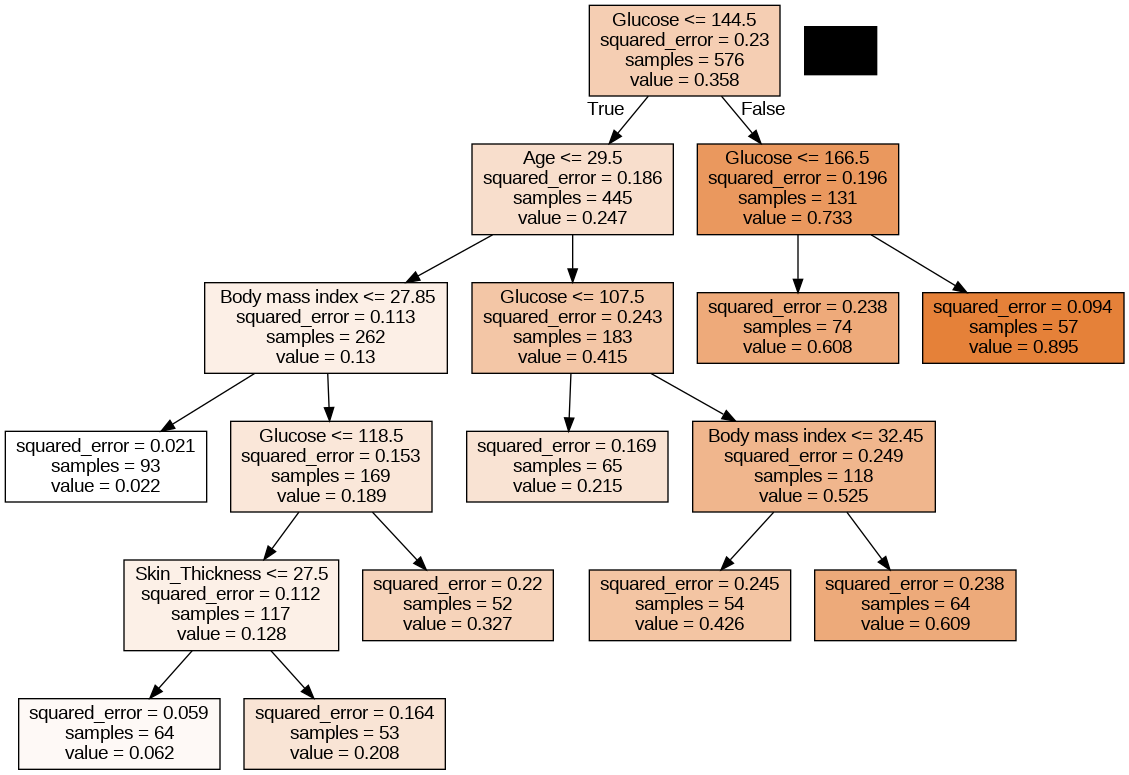

In [ ]:
regtree = tree.DecisionTreeRegressor(min_samples_leaf = 50, max_depth = 5)
regtree.fit(X_train, Y_train)
dot_data = tree.export_graphviz(regtree, out_file = None, feature_names = X_train.columns, class_names = ['Non-Diabetic', 'Diabetics'], filled = True)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_svg("regression_tree.svg")
Image(graph.create_png())
